In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
mortgage=pd.read_csv('mortgage.csv')
mortgage.head(3)

,acct_num,date,product_code,cc_cri,del_days,postal,balance,premium,auth_limit,insur_type,ltv,condo,amortization_years,tm_on_book_month
0,1,2014-12-31,10068,c,0,G2j1n1,700000,NO,7000,uninsured,0.25,no,22,38
1,2,2014-09-30,10067,b,0,G2j1n1,650000,NO,5000,uninsured,0.25,yes,22,35
2,3,2014-03-31,10067,a,0,E2j1n1,650000,NO,5000,uninsured,0.25,yes,15,5


In [3]:
mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_num            9999 non-null   int64  
 1   date                9999 non-null   object 
 2   product_code        9999 non-null   int64  
 3   cc_cri              9999 non-null   object 
 4   del_days            9999 non-null   int64  
 5   postal              9999 non-null   object 
 6   balance             9999 non-null   int64  
 7   premium             9999 non-null   object 
 8   auth_limit          9999 non-null   int64  
 9   insur_type          9999 non-null   object 
 10  ltv                 9999 non-null   float64
 11  condo               9999 non-null   object 
 12  amortization_years  9999 non-null   int64  
 13  tm_on_book_month    9999 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 1.1+ MB


In [4]:
mortgage['date'] = mortgage['date'].astype('datetime64')

In [5]:
mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   acct_num            9999 non-null   int64         
 1   date                9999 non-null   datetime64[ns]
 2   product_code        9999 non-null   int64         
 3   cc_cri              9999 non-null   object        
 4   del_days            9999 non-null   int64         
 5   postal              9999 non-null   object        
 6   balance             9999 non-null   int64         
 7   premium             9999 non-null   object        
 8   auth_limit          9999 non-null   int64         
 9   insur_type          9999 non-null   object        
 10  ltv                 9999 non-null   float64       
 11  condo               9999 non-null   object        
 12  amortization_years  9999 non-null   int64         
 13  tm_on_book_month    9999 non-null   int64       

In [6]:
mortgage['quarter'] = mortgage['date'].dt.year.astype('string') + '-'+ 'Q' + mortgage['date'].dt.quarter.astype('string')
mortgage.head(3)

,acct_num,date,product_code,cc_cri,del_days,postal,balance,premium,auth_limit,insur_type,ltv,condo,amortization_years,tm_on_book_month,quarter
0,1,2014-12-31,10068,c,0,G2j1n1,700000,NO,7000,uninsured,0.25,no,22,38,2014-Q4
1,2,2014-09-30,10067,b,0,G2j1n1,650000,NO,5000,uninsured,0.25,yes,22,35,2014-Q3
2,3,2014-03-31,10067,a,0,E2j1n1,650000,NO,5000,uninsured,0.25,yes,15,5,2014-Q1


# Residential Mortgages Reportable Delinquency

In [7]:
mortgage[(mortgage['del_days']>30) & (mortgage['del_days']<=90)].groupby(mortgage['quarter']).count()

,acct_num,date,product_code,cc_cri,del_days,postal,balance,premium,auth_limit,insur_type,ltv,condo,amortization_years,tm_on_book_month,quarter
quarter,,,,,,,,,,,,,,,
2013-Q3,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
2013-Q4,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2014-Q1,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
2014-Q2,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
2014-Q3,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
2014-Q4,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43


In [8]:
delinquency_qt_30 = pd.DataFrame({'delinq30':mortgage[(mortgage['del_days']>30) & (mortgage['del_days']<=90)]['del_days'].groupby(mortgage['quarter']).count()}).reset_index()
delinquency_qt_30

,quarter,delinq30
0,2013-Q3,25
1,2013-Q4,8
2,2014-Q1,30
3,2014-Q2,48
4,2014-Q3,44
5,2014-Q4,43


In [9]:
delinquency_qt_90 = pd.DataFrame({'delinq90':mortgage[mortgage['del_days']>90]['del_days'].groupby(mortgage['quarter']).count()}).reset_index()
delinquency_qt_90

,quarter,delinq90
0,2013-Q3,83
1,2013-Q4,44
2,2014-Q1,120
3,2014-Q2,139
4,2014-Q3,130
5,2014-Q4,109


In [10]:
delinquency_qt_total = pd.DataFrame({'total':mortgage['del_days'].groupby(mortgage['quarter']).count()}).reset_index()
delinquency_qt_total

,quarter,total
0,2013-Q3,1320
1,2013-Q4,688
2,2014-Q1,2003
3,2014-Q2,1958
4,2014-Q3,2100
5,2014-Q4,1930


In [11]:
delinquency_qt = delinquency_qt_30.merge(delinquency_qt_90.merge(delinquency_qt_total, on='quarter'),on='quarter')
delinquency_qt

,quarter,delinq30,delinq90,total
0,2013-Q3,25,83,1320
1,2013-Q4,8,44,688
2,2014-Q1,30,120,2003
3,2014-Q2,48,139,1958
4,2014-Q3,44,130,2100
5,2014-Q4,43,109,1930


In [12]:
delinquency_qt['delinq30_pct'] = round(delinquency_qt['delinq30']/delinquency_qt['total'],4)
delinquency_qt['delinq90_pct'] = round(delinquency_qt['delinq90']/delinquency_qt['total'],4)
delinquency_qt['delinq_pct'] = round((delinquency_qt['delinq30']+delinquency_qt['delinq90'])/delinquency_qt['total'],4)
delinquency_qt

,quarter,delinq30,delinq90,total,delinq30_pct,delinq90_pct,delinq_pct
0,2013-Q3,25,83,1320,0.0189,0.0629,0.0818
1,2013-Q4,8,44,688,0.0116,0.0640,0.0756
2,2014-Q1,30,120,2003,0.0150,0.0599,0.0749
3,2014-Q2,48,139,1958,0.0245,0.0710,0.0955
4,2014-Q3,44,130,2100,0.0210,0.0619,0.0829
5,2014-Q4,43,109,1930,0.0223,0.0565,0.0788


In [13]:
# To graph, *100 for percentage
delinquency_qt['delinq30_pct'] = round(delinquency_qt['delinq30']/delinquency_qt['total']*100,2)
delinquency_qt['delinq90_pct'] = round(delinquency_qt['delinq90']/delinquency_qt['total']*100,2)
delinquency_qt['delinq_pct'] = round((delinquency_qt['delinq30']+delinquency_qt['delinq90'])/delinquency_qt['total']*100,2)
delinquency_qt

,quarter,delinq30,delinq90,total,delinq30_pct,delinq90_pct,delinq_pct
0,2013-Q3,25,83,1320,1.89,6.29,8.18
1,2013-Q4,8,44,688,1.16,6.40,7.56
2,2014-Q1,30,120,2003,1.50,5.99,7.49
3,2014-Q2,48,139,1958,2.45,7.10,9.55
4,2014-Q3,44,130,2100,2.10,6.19,8.29
5,2014-Q4,43,109,1930,2.23,5.65,7.88


# Residential Mortgage Regional Delinquency

In [14]:
postCode = pd.read_html(r'https://en.wikipedia.org/wiki/Postal_codes_in_Canada')

In [15]:
postCode[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,NL,NS,PE,NB,QC,QC,QC,ON,ON,ON,ON,ON,MB,SK,AB,BC,NU/NT,YT
1,A,B,C,E,G,H,J,K,L,M,N,P,R,S,T,V,X,Y


In [16]:
postCode1 = postCode[1]
postCode1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,NL,NS,PE,NB,QC,QC,QC,ON,ON,ON,ON,ON,MB,SK,AB,BC,NU/NT,YT
1,A,B,C,E,G,H,J,K,L,M,N,P,R,S,T,V,X,Y


In [17]:
postCode1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2 non-null      object
 1   1       2 non-null      object
 2   2       2 non-null      object
 3   3       2 non-null      object
 4   4       2 non-null      object
 5   5       2 non-null      object
 6   6       2 non-null      object
 7   7       2 non-null      object
 8   8       2 non-null      object
 9   9       2 non-null      object
 10  10      2 non-null      object
 11  11      2 non-null      object
 12  12      2 non-null      object
 13  13      2 non-null      object
 14  14      2 non-null      object
 15  15      2 non-null      object
 16  16      2 non-null      object
 17  17      2 non-null      object
dtypes: object(18)
memory usage: 416.0+ bytes


In [18]:
# "H" for the Montreal region, and "M" for Toronto
postCodeMOON = pd.DataFrame({'province': ['QC', 'ON'], 'postCode1':['H', 'M'], 'region':['Montreal', 'Toronto']})
postCodeMOON

,province,postCode1,region
0,QC,H,Montreal
1,ON,M,Toronto


In [19]:
# First letters of provincial post code
postCodeCA = postCode1.transpose().rename(columns={0:'province', 1:'postCode1'})
postCodeCA

,province,postCode1
0,NL,A
1,NS,B
2,PE,C
3,NB,E
4,QC,G
5,QC,H
6,QC,J
7,ON,K
8,ON,L
9,ON,M


In [20]:
postCodeCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   province   18 non-null     object
 1   postCode1  18 non-null     object
dtypes: object(2)
memory usage: 988.0+ bytes


In [23]:
# Add column of 'region' by geographic rules
for prov in postCodeCA['province']:
    if prov in ('NL', 'NS', 'PE', 'NB'):
        postCodeCA.loc[postCodeCA['province']==prov, 'region'] = 'Atlantic'
    elif prov in ('MB', 'SK', 'AB'):
        postCodeCA.loc[postCodeCA['province']==prov, 'region'] = 'Prairies'
    elif prov in ('ON', 'QC'):
        postCodeCA.loc[postCodeCA['province']=='ON', 'region'] = 'Ontario'
        postCodeCA.loc[postCodeCA['province']=='QC', 'region'] = 'Quebec'
    elif prov in ('NU/NT', 'YT'):
        postCodeCA.loc[postCodeCA['province']==prov, 'region'] = 'Territories'
    else:
        postCodeCA.loc[postCodeCA['province']==prov, 'region'] = postCodeCA['province']
postCodeCA

,province,postCode1,region
0,NL,A,Atlantic
1,NS,B,Atlantic
2,PE,C,Atlantic
3,NB,E,Atlantic
4,QC,G,Quebec
5,QC,H,Quebec
6,QC,J,Quebec
7,ON,K,Ontario
8,ON,L,Ontario
9,ON,M,Ontario


In [24]:
mortgage.head(3)

,acct_num,date,product_code,cc_cri,del_days,postal,balance,premium,auth_limit,insur_type,ltv,condo,amortization_years,tm_on_book_month,quarter
0,1,2014-12-31,10068,c,0,G2j1n1,700000,NO,7000,uninsured,0.25,no,22,38,2014-Q4
1,2,2014-09-30,10067,b,0,G2j1n1,650000,NO,5000,uninsured,0.25,yes,22,35,2014-Q3
2,3,2014-03-31,10067,a,0,E2j1n1,650000,NO,5000,uninsured,0.25,yes,15,5,2014-Q1


In [25]:
# Add provincial post code information into table 'mortgage'
mortgage_postalP = mortgage.merge(postCodeCA, how="left", left_on=mortgage['postal'].str[0].str.upper(), right_on=postCodeCA['postCode1'])
mortgage_postalP.drop(columns=['key_0'], inplace=True)

In [26]:
mortgage_postalP.head(3)

,acct_num,date,product_code,cc_cri,del_days,postal,balance,premium,auth_limit,insur_type,ltv,condo,amortization_years,tm_on_book_month,quarter,province,postCode1,region
0,1,2014-12-31,10068,c,0,G2j1n1,700000,NO,7000,uninsured,0.25,no,22,38,2014-Q4,QC,G,Quebec
1,2,2014-09-30,10067,b,0,G2j1n1,650000,NO,5000,uninsured,0.25,yes,22,35,2014-Q3,QC,G,Quebec
2,3,2014-03-31,10067,a,0,E2j1n1,650000,NO,5000,uninsured,0.25,yes,15,5,2014-Q1,NB,E,Atlantic


In [27]:
# Calculate delinquency ratio at region level
delinquency_province = pd.DataFrame({'delinq':mortgage_postalP[mortgage_postalP['del_days']>30]['del_days'].groupby([mortgage_postalP['region'],mortgage_postalP['quarter']]).count()}).reset_index()
province_total = pd.DataFrame({'total':mortgage_postalP['del_days'].groupby([mortgage_postalP['region'],mortgage_postalP['quarter']]).count()}).reset_index()
delinquency_province = delinquency_province.merge(province_total, on=['region', 'quarter'])
delinquency_province = delinquency_province.sort_values(['region', 'quarter'])
delinquency_province['delinq_ratio'] = (delinquency_province['delinq'] / delinquency_province['total']).round(4)
delinquency_province

,region,quarter,delinq,total,delinq_ratio
0,Atlantic,2013-Q3,14,283,0.0495
1,Atlantic,2013-Q4,10,148,0.0676
2,Atlantic,2014-Q1,32,396,0.0808
3,Atlantic,2014-Q2,35,394,0.0888
4,Atlantic,2014-Q3,34,388,0.0876
5,Atlantic,2014-Q4,37,350,0.1057
6,BC,2013-Q3,11,70,0.1571
7,BC,2013-Q4,3,38,0.0789
8,BC,2014-Q1,6,99,0.0606
9,BC,2014-Q2,6,100,0.0600


In [28]:
# Add Montreal and Toronto information into 'mortgage'
mortgage_postalC = mortgage.merge(postCodeMOON, how="left", left_on=mortgage['postal'].str[0].str.upper(), right_on=postCodeMOON['postCode1'])
mortgage_postalC.drop(columns=['key_0'], inplace=True)

In [29]:
mortgage_postalC.head(3)

,acct_num,date,product_code,cc_cri,del_days,postal,balance,premium,auth_limit,insur_type,ltv,condo,amortization_years,tm_on_book_month,quarter,province,postCode1,region
0,1,2014-12-31,10068,c,0,G2j1n1,700000,NO,7000,uninsured,0.25,no,22,38,2014-Q4,NaN,NaN,NaN
1,2,2014-09-30,10067,b,0,G2j1n1,650000,NO,5000,uninsured,0.25,yes,22,35,2014-Q3,NaN,NaN,NaN
2,3,2014-03-31,10067,a,0,E2j1n1,650000,NO,5000,uninsured,0.25,yes,15,5,2014-Q1,NaN,NaN,NaN


In [30]:
# Calculate delinquency ratio for Montreal and Toronto
delinquency_city = pd.DataFrame({'delinq':mortgage_postalC[mortgage_postalC['del_days']>30]['del_days'].groupby([mortgage_postalC['region'],mortgage_postalC['quarter']]).count()}).reset_index()
city_total = pd.DataFrame({'total':mortgage_postalC['del_days'].groupby([mortgage_postalC['region'],mortgage_postalC['quarter']]).count()}).reset_index()
delinquency_city = delinquency_city.merge(city_total, on=['region', 'quarter'])
delinquency_city['delinq_ratio'] = (delinquency_city['delinq'] / delinquency_city['total']).round(4)
delinquency_city

,region,quarter,delinq,total,delinq_ratio
0,Montreal,2013-Q3,8,75,0.1067
1,Montreal,2013-Q4,2,27,0.0741
2,Montreal,2014-Q1,6,98,0.0612
3,Montreal,2014-Q2,5,93,0.0538
4,Montreal,2014-Q3,8,109,0.0734
5,Montreal,2014-Q4,6,89,0.0674
6,Toronto,2013-Q3,18,192,0.0938
7,Toronto,2013-Q4,9,104,0.0865
8,Toronto,2014-Q1,22,279,0.0789
9,Toronto,2014-Q2,27,281,0.0961


In [31]:
mortgage.head(3)

,acct_num,date,product_code,cc_cri,del_days,postal,balance,premium,auth_limit,insur_type,ltv,condo,amortization_years,tm_on_book_month,quarter
0,1,2014-12-31,10068,c,0,G2j1n1,700000,NO,7000,uninsured,0.25,no,22,38,2014-Q4
1,2,2014-09-30,10067,b,0,G2j1n1,650000,NO,5000,uninsured,0.25,yes,22,35,2014-Q3
2,3,2014-03-31,10067,a,0,E2j1n1,650000,NO,5000,uninsured,0.25,yes,15,5,2014-Q1


In [32]:
# Calculate delinquency ratio for whole Canada
delinquency_all = pd.DataFrame({'region':'All Canada','delinq':mortgage[mortgage['del_days']>30]['del_days'].groupby(mortgage['quarter']).count()})
CA_total = pd.DataFrame({'region':'All Canada','total':mortgage['del_days'].groupby(mortgage['quarter']).count()})
delinquency_all = delinquency_all.merge(CA_total, on=['region','quarter']).reset_index()
delinquency_all['delinq_ratio'] = (delinquency_all['delinq'] / delinquency_all['total']).round(4)
delinquency_all = delinquency_all[['region', 'quarter', 'delinq', 'total', 'delinq_ratio']]
delinquency_all

,region,quarter,delinq,total,delinq_ratio
0,All Canada,2013-Q3,108,1320,0.0818
1,All Canada,2013-Q4,52,688,0.0756
2,All Canada,2014-Q1,150,2003,0.0749
3,All Canada,2014-Q2,187,1958,0.0955
4,All Canada,2014-Q3,174,2100,0.0829
5,All Canada,2014-Q4,152,1930,0.0788


In [33]:
# Concatenate province, city, and whole Canada 
delinquency_CA = pd.concat([delinquency_province, delinquency_city, delinquency_all]).reset_index(drop=True)
delinquency_CA

,region,quarter,delinq,total,delinq_ratio
0,Atlantic,2013-Q3,14,283,0.0495
1,Atlantic,2013-Q4,10,148,0.0676
2,Atlantic,2014-Q1,32,396,0.0808
3,Atlantic,2014-Q2,35,394,0.0888
4,Atlantic,2014-Q3,34,388,0.0876
5,Atlantic,2014-Q4,37,350,0.1057
6,BC,2013-Q3,11,70,0.1571
7,BC,2013-Q4,3,38,0.0789
8,BC,2014-Q1,6,99,0.0606
9,BC,2014-Q2,6,100,0.0600


# Mortgage Share of Outstandings by Insurance Type

In [34]:
mortgage.head(3)

,acct_num,date,product_code,cc_cri,del_days,postal,balance,premium,auth_limit,insur_type,ltv,condo,amortization_years,tm_on_book_month,quarter
0,1,2014-12-31,10068,c,0,G2j1n1,700000,NO,7000,uninsured,0.25,no,22,38,2014-Q4
1,2,2014-09-30,10067,b,0,G2j1n1,650000,NO,5000,uninsured,0.25,yes,22,35,2014-Q3
2,3,2014-03-31,10067,a,0,E2j1n1,650000,NO,5000,uninsured,0.25,yes,15,5,2014-Q1


In [35]:
insur_type = pd.DataFrame({'count':mortgage['insur_type'].groupby([mortgage['insur_type'], mortgage['quarter']]).count()}).reset_index()
insur_type                         

,insur_type,quarter,count
0,bulk,2013-Q3,67
1,bulk,2013-Q4,40
2,bulk,2014-Q1,86
3,bulk,2014-Q2,106
4,bulk,2014-Q3,99
5,bulk,2014-Q4,92
6,heloc,2013-Q3,62
7,heloc,2013-Q4,32
8,heloc,2014-Q1,80
9,heloc,2014-Q2,94


In [36]:
insur_total = pd.DataFrame({'quarter_total':mortgage['insur_type'].groupby(mortgage['quarter']).count()}).reset_index()
insur_total

,quarter,quarter_total
0,2013-Q3,1320
1,2013-Q4,688
2,2014-Q1,2003
3,2014-Q2,1958
4,2014-Q3,2100
5,2014-Q4,1930


In [37]:
insurance = insur_type.merge(insur_total, on='quarter').sort_values(['insur_type','quarter']).reset_index(drop=True)
insurance['ratio'] = round(insurance['count'] / insurance['quarter_total'], 4)
insurance

,insur_type,quarter,count,quarter_total,ratio
0,bulk,2013-Q3,67,1320,0.0508
1,bulk,2013-Q4,40,688,0.0581
2,bulk,2014-Q1,86,2003,0.0429
3,bulk,2014-Q2,106,1958,0.0541
4,bulk,2014-Q3,99,2100,0.0471
5,bulk,2014-Q4,92,1930,0.0477
6,heloc,2013-Q3,62,1320,0.0470
7,heloc,2013-Q4,32,688,0.0465
8,heloc,2014-Q1,80,2003,0.0399
9,heloc,2014-Q2,94,1958,0.0480


# Output to Excel file

In [38]:
with pd.ExcelWriter('mortgage.xlsx') as writer:
    delinquency_qt.to_excel(writer, sheet_name='delinquency_quarter', index=False)
    delinquency_CA.to_excel(writer, sheet_name='delinquency_CA', index=False)
    insurance.to_excel(writer, sheet_name='insurance_type', index=False)

# Draw Dashboard

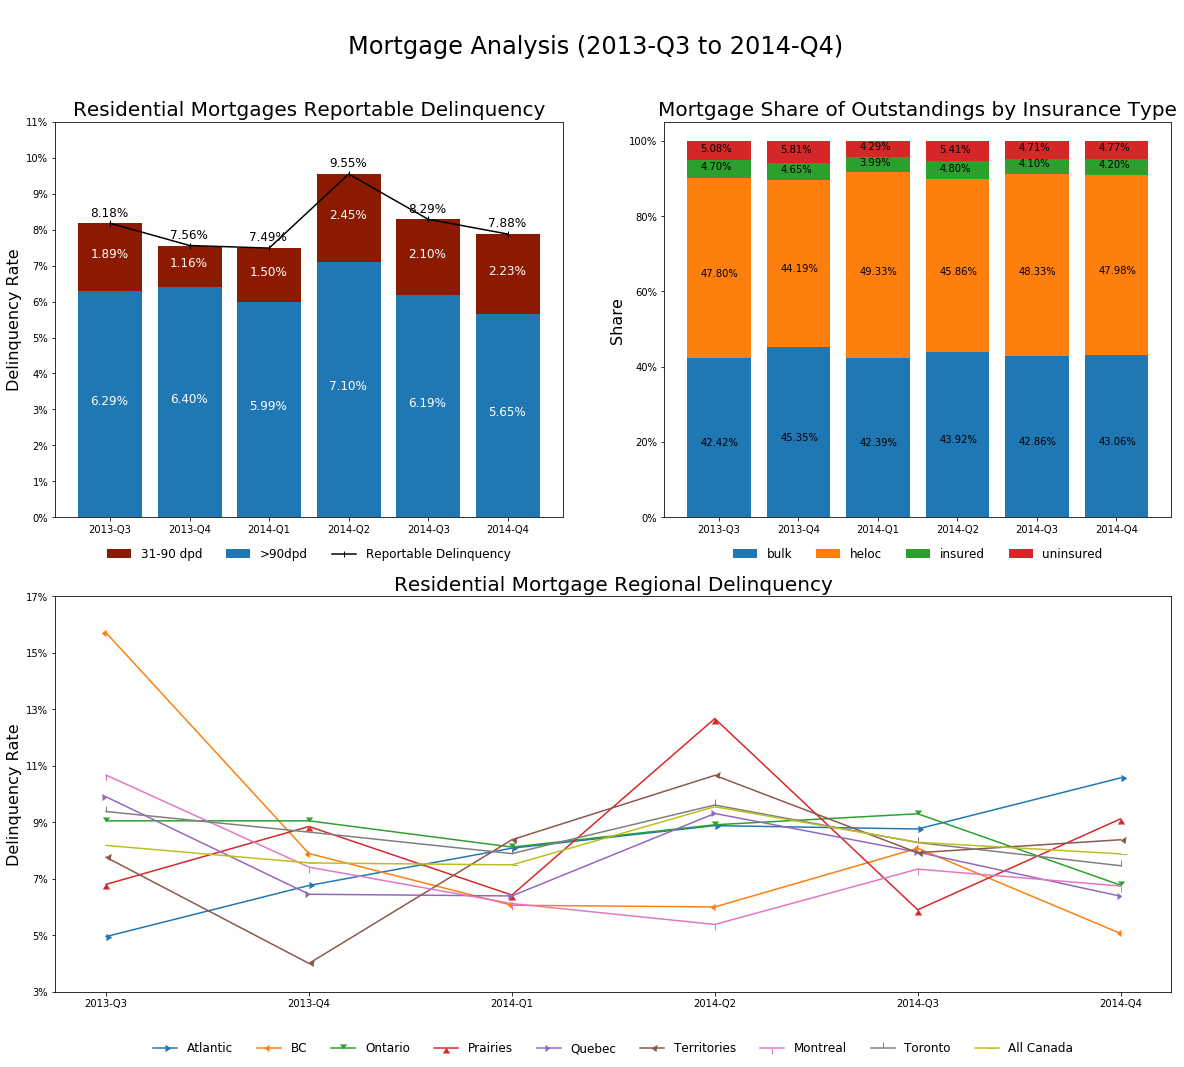

In [41]:
import matplotlib.ticker as mtick

fig = plt.subplots(2, 2, figsize=(20,16))

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(212)

# Residential Mortgage Reportable Delinquency
ax1.bar(delinquency_qt['quarter'],delinquency_qt['delinq90_pct'], label='>90dpd')
ax1.bar(delinquency_qt['quarter'],delinquency_qt['delinq30_pct'], label='31-90 dpd', bottom=delinquency_qt['delinq90_pct'], color=(.55,.1,0,1))
ax1.plot(delinquency_qt['quarter'],delinquency_qt['delinq_pct'], marker='|', label='Reportable Delinquency', color='k')
ax1.set_yticks(np.arange(0, 12))
ax1.set_ylabel('Delinquency Rate',fontsize=16)
ax1.set_title('Residential Mortgages Reportable Delinquency', fontsize=20)

handles, labels = ax1.get_legend_handles_labels()
handles = [handles[2], handles[1], handles[0]]
labels = [labels[2], labels[1], labels[0]]

ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.05), fancybox=True, shadow=True, ncol=3, frameon=False, fontsize=12)

for i in range(delinquency_qt['quarter'].count()):
    ax1.text(x=i-.25, y=delinquency_qt['delinq90_pct'][i]*.5, s=str('%.2f' % delinquency_qt['delinq90_pct'][i]) + '%', size=12, color='w')
    ax1.text(x=i-.25, y=delinquency_qt['delinq90_pct'][i]+delinquency_qt['delinq30_pct'][i]*.5, s=str('%.2f' % delinquency_qt['delinq30_pct'][i]) + '%', size=12, color='w')
    ax1.text(x=i-.25, y=delinquency_qt['delinq90_pct'][i]+delinquency_qt['delinq30_pct'][i]+.2, s=str('%.2f' % delinquency_qt['delinq_pct'][i]) + '%', size=12)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# Mortgage Share of Outstandings by Insurance Type
cum = np.zeros(len(insurance['quarter'].unique()))
legend = []
for type in insurance['insur_type'].sort_values(ascending=False).unique():
    x = insurance[insurance['insur_type']==type]['quarter'].reset_index(drop=True)
    y = insurance[insurance['insur_type']==type]['ratio'].reset_index(drop=True)
    ax2.bar(x, y, bottom=cum, label=type)
    
    for i in range(len(insurance['quarter'].unique())):
        ax2.text(i-.23, cum[i]+y[i]*.45, s=str('%.2f' % (y[i]*100) + '%'))
    cum += y
    legend.append(type)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(round(x,2)) for x in vals])
ax2.set_ylabel('Share', size=16)
ax2.set_title('Mortgage Share of Outstandings by Insurance Type', size=20)
legend.reverse()
ax2.legend(legend, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4, frameon=False, fontsize=12)


# Residential Mortgage Regional Delinquency
n = 9
legend = []
for type in delinquency_CA['region'].unique():
    x = delinquency_CA[delinquency_CA['region']==type]['quarter']
    y = delinquency_CA[delinquency_CA['region']==type]['delinq_ratio']
    ax3.plot(x, y, label=type, marker=n)
    n -= 1

ax3.set_yticks(np.arange(min(delinquency_CA['delinq_ratio']-.01), max(delinquency_CA['delinq_ratio']+.02), 0.02))
vals = ax3.get_yticks()
ax3.set_yticklabels(['{:.0%}'.format(round(x,2)) for x in vals])
ax3.set_ylabel('Delinquency Rate', size=16)
ax3.set_title('Residential Mortgage Regional Delinquency', size=20)
ax3.legend( loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=9, frameon=False, fontsize=12)

plt.suptitle('\n'+('Mortgage Analysis (2013-Q3 to 2014-Q4)'), size=24)

plt.savefig('Mortgage')
plt.show()